In [1]:
import numpy as np
film = np.loadtxt('filmwise.dat',skiprows=1)
print(film)

[[  0.1    34.5    37.7    71.3    38.   ]
 [  0.2    34.3    35.     70.5    36.   ]
 [  0.3    34.1    35.     71.2    35.35 ]
 [  0.4    34.     36.     70.7    40.   ]
 [  0.5    34.     36.     71.     45.   ]
 [  0.6    34.     38.     70.9    48.   ]
 [  0.5    31.9    34.     66.9    49.   ]
 [  0.2    34.3    34.6    70.4    34.946]
 [  0.3    34.6    34.9    70.8    35.249]
 [  0.4    34.7    34.9    71.6    35.249]
 [  0.5    34.6    34.8    70.8    35.148]
 [  0.6    34.7    34.9    71.4    35.249]
 [  0.1    31.5    44.1    67.3    54.   ]
 [  0.2    31.3    36.6    68.8    39.3  ]
 [  0.3    31.3    40.7    71.8    62.1  ]
 [  0.4    31.4    40.5    71.9    65.   ]
 [  0.5    31.4    38.9    71.9    63.3  ]
 [  0.6    31.6    38.     71.9    60.2  ]
 [  0.7    31.6    37.9    71.9    62.5  ]]


Data is given in the following units:
* Flow rate (Flow) in L/min - Column 0
* Inlet Temperature (Tin) - Column 1
* Outlet Temperature (Tout) - Column 2
* Saturation Temperature (Tsat) - Column 3
* Surface Temperature (Tsurf) - Column 4

Equations<br>
* Flow rate conversion to SI units (can you remember this one?
* Change in energy of cooling water in the pipe (- equal to heat transfer rate):  $$\dot{m}C_p \Delta T$$
* Convert heat transfer rate to heat flux (e.g. divide by the pipe surface area)
* Using the log mean temperature difference, determine the heat transfer coefficient
$$\Delta T_{ln} = \frac{\left( T_{sat}-T_{in} \right)-\left( T_{sat}-T_{out}\right)}{ln\frac{\left( T_{sat}-T_{in} \right)}{\left( T_{sat}-T_{out} \right)}}$$
* $$\dot{q}=h \Delta T_{ln}$$

In [6]:
Qdot = film[:,0]/60*4186*(film[:,2]-film[:,1])
qdot = Qdot/(np.pi*0.098*0.0127)
print(Qdot)
print(qdot)
dT = film[:,3]-film[:,4]

[  22.32533333    9.76733333   18.837        55.81333333   69.76666667
  167.44         73.255         4.186         6.279         5.58133333
    6.97666667    8.372        87.906        73.95266667  196.742
  253.95066667  261.625       267.904       307.671     ]
[  5709.76563743   2498.02246638   4817.61475658  14274.41409358
  17843.01761698  42823.24228074  18735.16849783   1070.58105702
   1605.87158553   1427.44140936   1784.3017617    2141.16211404
  22482.20219739  18913.598674    50317.30967987  64948.5841258
  66911.31606366  68517.18764919  78687.70769087]


In [7]:
Tln = ((film[:,4]-film[:,1])-(film[:,4]-film[:,2]))/(np.log((film[:,4]-film[:,1])/(film[:,4]-film[:,2])))
print(Tln)
htc = qdot/dT
print(htc)

[  1.30254138   1.31919098   0.70701042   4.93260692   9.96657731
  11.88805365  16.02707661   0.48049146   0.48358955   0.44147526
   0.440458     0.44147526  15.34750119   4.87944202  25.81539802
  28.81087549  27.98268592  25.26504324  27.63039848]
[  171.46443356    72.4064483    134.38255946   464.96462846   686.26990835
  1870.01057995  1046.65745798    30.19634053    45.17092587    39.26828449
    50.04773257    59.22829559  1690.39114266   641.1389381   5187.35151339
  9412.8382791   7780.3855888   5856.16988455  8371.03273307]


[ 33.3    34.5    35.85   30.7    26.     22.9    17.9    35.454  35.551
  36.351  35.652  36.151  13.3    29.5     9.7     6.9     8.6    11.7
   9.4  ]


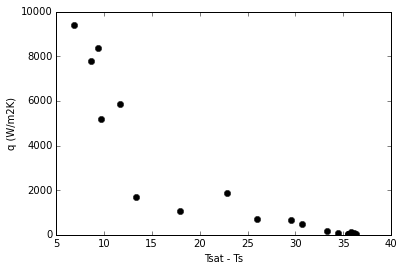

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
#plt.plot(dT, qdot, 'o')
plt.plot(dT, htc, 'ko')
plt.xlabel('Tsat - Ts')
plt.ylabel('q (W/m2K)')
print(dT)

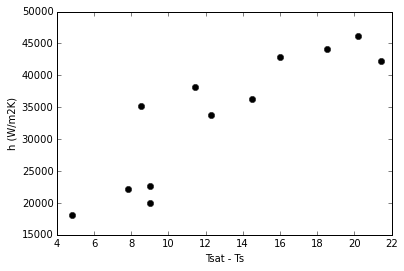

In [11]:
film = np.loadtxt('dropwise.dat',skiprows=1)
Qdot = film[:,0]/60*4186*(film[:,2]-film[:,1])
qdot = Qdot/(np.pi*0.098*0.0127)
dT = film[:,3]-film[:,4]
Tln = ((film[:,4]-film[:,1])-(film[:,4]-film[:,2]))/(np.log((film[:,4]-film[:,1])/(film[:,4]-film[:,2])))
htc = qdot/dT
plt.plot(dT, htc, 'ko')
plt.xlabel('Tsat - Ts')
plt.ylabel('h (W/m2K)')

It is evident that the heat-transfer coefficient depends on pressure and D T or q (as shown by the curvature of the q-D T graphs). In contrast to ® lm condensation, the
heat-transfer coef® cient increases with vapour-to-surface
temperature difference or heat ¯ ux reaching an almost
constant value.